<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624 Final Project</h1>
#### By: Carli Merrick-Rogers

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Content
1. <a href="#Section1">Intro</a>
1. <a href="#Section2">Import/Eigen</a>
1. <a href="#Section3">PCA</a>
1. <a href="#Section4">Eigen Vector Space</a>
1. <a href="#Section5">Feature Vector Space</a>
1. <a href="#Section6">Change Map</a>

--------

<a name="Section1"></a>
## Change Detection/Difference Image

A difference image is the pixel-by-pixel subtraction of 2 images.
Eigen vectors of pixel blocks from the difference image will be extracted by Principal Component Analysis (PCA) 

Steps towards implementing this application are:
1. Difference image generation and Eigen vector space (EVS)
2. Building the feature vector space (FVS)
3. Clustering of the feature vector space and change map

The difference image has the absolute valued differences of the intensity values of the corresponding pixels of the 2 grayscale images.

The computed difference image would be such that the values of the pixels associated with land changes will have values significantly different from those of the pixels associated with unchanged areas.

In [35]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('ta.jpg')
img2=mpimg.imread('tb.jpg')


Populating the interactive namespace from numpy and matplotlib


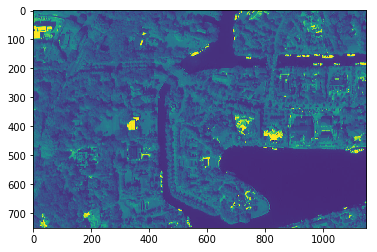

In [36]:
imgplot = plt.imshow(img)
plt.show()

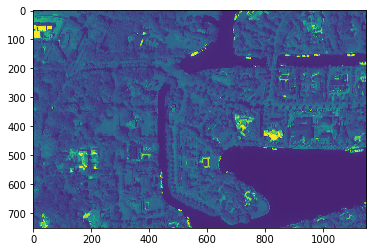

In [37]:
imgplot = plt.imshow(img2)
plt.show()

<a name="Section2"></a>
### Import Images:

In [38]:
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image
from scipy.misc import imresize

image1 = mpimg.imread('ta.jpg')
image2 = mpimg.imread('tb.jpg')

new_size = np.asarray(image1.shape) / 5 * 5

diff_image = abs(image1 - image2) #difference image

### Next is building the Eigen vector space:

A little PCA info first: Principal Component Analysis is a technique to emphasise variation and bring out strong patterns in a data set. It converts a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called "principal components."

An EOF is a PCA applied to time series data.

PCA takes a data set and determines its co-variance matrix after performing mean normalisation on it. The Eigen vectors and Eigen values of the co-variance matrix are computed and then the Eigen vectors are sorted in the descending order of Eigen values.

The Eigen vectors have been sorted in the decreasing order of the Eigen values because the Eigen vector with the highest Eigen value is the principal component of the data set, and this vector shows along which direction the majority of the data is inclined

In [44]:
def find_vector_set(diff_image, new_size):
    
    i = 0
    j = 0
    vector_set = np.zeros(((new_size[0] * new_size[1]) / 25, 25))
    while i < vector_set.shape[0]:
        while j < new_size[0]:
            k = 0
            while k < new_size[1]:
                block   = diff_image[j:j+5, k:k+5]
                feature = block.ravel()
                vector_set[i, :] = feature
                k = k + 5
            j = j + 5
        i = i + 1
           
    mean_vec   = np.mean(vector_set, axis = 0)    
    vector_set = vector_set - mean_vec   #mean normalization
    
    return vector_set, mean_vec

<a name="Section3"></a>
### PCA is then applied on this vector set to get the Eigen vector space

In [40]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(vector_set)
EVS = pca.components_

NameError: name 'vector_set' is not defined

----------------
<a name="Section4"></a>
### Building the Feature Vector Space


In [41]:
def find_FVS(EVS, diff_image, mean_vec, new):
   
    i = 2 
    feature_vector_set = []
    
    while i < new[0] - 2:
        j = 2
        while j < new[1] - 2:
            block = diff_image[i-2:i+3, j-2:j+3]
            feature = block.flatten()
            feature_vector_set.append(feature)
            j = j+1
        i = i+1
        
    FVS = np.dot(feature_vector_set, EVS)
    FVS = FVS - mean_vec
    return FVS

# Clustering of the feature vector space, and change map

In [42]:
from sklearn.cluster import KMeans
from collections import Counter

def clustering(FVS, components, new):
    
    kmeans = KMeans(components, verbose = 0)
    kmeans.fit(FVS)
    output = kmeans.predict(FVS)
    count  = Counter(output)

    least_index = min(count, key = count.get)            
    change_map  = np.reshape(output,(new[0] - 4, new[1] - 4))    
    return least_index, change_map

## How do we decide which of these clusters contains the pixels that belong to the changed class?
It can be postulated that the cluster which contains the lowest number of pixels (denoted by variable least_index) is the cluster denoting the changed class, since the background remains more or less the same in satellite images and the changes occurred are comparatively less. Also, the mean of this cluster will be the highest. The reason behind the highest value of mean for that cluster is that the values of the difference image pixels in a region where some changes have occurred are higher than the values of pixels in the regions where there is no change.

### The cluster with the lowest number of pixels, and also the highest mean is the cluster belonging to the changed class.

------------
<a name='Section5'></a>
# Now Build a Change Map

In [43]:
change_map[change_map == least_index] = 255    
change_map[change_map != 255] = 0
imsave('change_map.jpg', change_map)

NameError: name 'change_map' is not defined

# Conclusions/Future Work

Try using some of the EOF code from class for the PCA

KEEP MESSING WITH THIS CODE UNTIL YOU GET A CHANGE DETECTION TO WORK.